# ДЗ по логистической регрессии (Копия блокнота lection2.ipynb)
**Задание**. Для каждого объекта известны два признака и метка класса ${0, 1}$. Используя метод максимального правдоподобия и градиентный метод найти значения параметров логистической регрессии максимизирующие функцию правдоподобия.
Логистическая регрессия:
$$
y^* = \frac{1}{1 + e^{-(a_0 + a_1x_1 + a_2x_2)}}.
$$

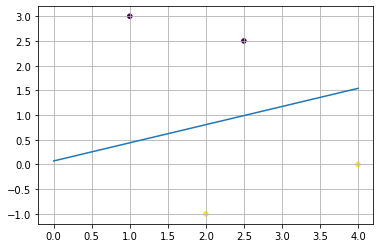

In [ ]:
from matplotlib import pyplot as plt
import math
%matplotlib inline

def L(a0, a1, a2):
  return sum(y[i] * math.log(sigmoid(a0 + a1 * X1[i] + a2 * X2[i]) + (1 - y[i]) * math.log(1 - sigmoid(a0 + a1 * X1[i] + a2 * X2[i])) for i in range(len(y))))

def sigmoid(x):
    return 1 / (1 + math.exp(-x)) # функция логистической регрессии

def predict(x1, x2):
  return [sigmoid(a0 + a1 * x1[i] + a2 * x2[i]) for i in range(len(x1))]

X1 = [2.5, 1, 2, 4]
X2 = [2.5, 3, -1, 0]
y = [0, 0, 1, 1]

a0 = 1
a1 = 1
a2 = 1

alpha = 0.01
epsilon = 0.0001

der_L_a0 = sum((y[i]- sigmoid(a0+a1*X1[i]+a2*X2[i])) for i in range(len(y)))
der_L_a1 = sum((y[i]- sigmoid(a0+a1*X1[i]+a2*X2[i]))*X1[i] for i in range(len(y)))
der_L_a2 = sum((y[i]- sigmoid(a0+a1*X1[i]+a2*X2[i]))*X2[i] for i in range(len(y)))

while (abs(der_L_a0)>epsilon or abs(der_L_a1)>epsilon or abs(der_L_a2) > epsilon):
  #print(a0, a1, a2)
  a0 += alpha*der_L_a0
  a1 += alpha*der_L_a1
  a2 += alpha*der_L_a2
  der_L_a0 = sum((y[i]- sigmoid(a0 + a1 * X1[i] + a2*X2[i])) for i in range(len(y)))
  der_L_a1 = sum((y[i]- sigmoid(a0+a1*X1[i]+a2*X2[i]))*X1[i] for i in range(len(y)))
  der_L_a2 = sum((y[i]- sigmoid(a0+a1*X1[i]+a2*X2[i]))*X2[i] for i in range(len(y)))

plt.scatter(X1, X2, 20, c = y, marker='o')
plt.plot(list(range(5)), [(-a0 - a1*i) / a2 for i in range(5)])
plt.grid()

In [ ]:
print(a0, a1, a2)

0.48394373497872406 2.4757571528977667 -6.741513480182125


In [ ]:
predict(X1, X2)

[3.790282210507908e-05,
 3.1766944007317734e-08,
 0.9999948523829989,
 0.9999691694099565]

# ДЗ по МНК (lections.ipynb)
**Задание**. По набору данных `data` найти коэффициенты линейной регрессии методом МНК.

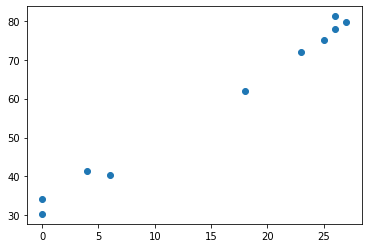

In [ ]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#данные из лекции
data = [[0, 30.378862502313527],
 [0, 34.31012249384681],
 [4, 41.53259662264244],
 [6, 40.34716067008714],
 [18, 61.96546654932585],
 [23, 71.98179224937317],
 [25, 75.07669614724911],
 [26, 77.8825627897107],
 [26, 81.1638850356703],
 [27, 79.72823981772834]]

#получаем x и y из данных
x = [x[0] for x in data]
y = [y[1] for y in data]

#преобразуем в массив array из библиотеки pandas для визуализации данных 
xPD = pd.array(x)
yPD = pd.array(y)
#строим график
plt.scatter(xPD, yPD)
plt.show()


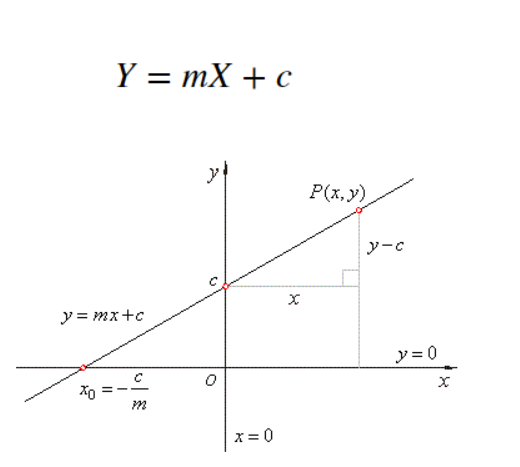

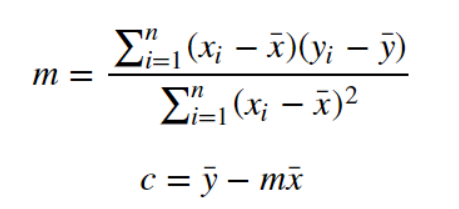

In [ ]:
xPD_mean = np.mean(xPD)   #среднее значение по x
yPD_mean = np.mean(yPD)   #среднее значение по y

num = 0                     #сумматоры
den = 0                     #сумматоры
for i in range(len(xPD)):
    num += (xPD[i] - xPD_mean)*(yPD[i] - yPD_mean)     #ищем числитель для формулы m
    den += (xPD[i] - xPD_mean)**2                      #ищем знаменатель для формулы m

#вычислем коэффициенты для уравнения
m = num / den
c = yPD_mean - m * xPD_mean

print (m, c)

1.7635631168772492 32.10151017619738


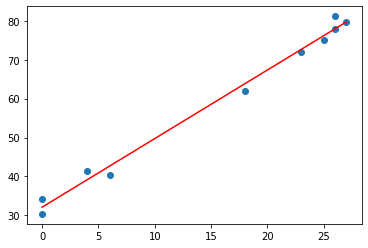

In [ ]:
Y_pred = c + m*xPD              #полученное уравнение

#визуализация
plt.scatter(xPD, yPD) 
#plt.scatter(xPD, Y_pred, color='red')
plt.plot([min(xPD), max(xPD)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

# ДЗ по многослойному персептрону (ANN.ipynb)
**Задание**. Найти в 
sklearn.datasets
 данные для задачи многоклассовой классификации, построить и обучить на этих данных многослойный персептрон.

In [ ]:
from sklearn.datasets import load_wine # импортируем данные (набор данных вина (классификация))
data = load_wine()  # загрузка данных

In [ ]:
X = data['data'] 
X.shape # возвращает количество образцов и размерность

(178, 13)

In [ ]:
y = data['target']

In [ ]:
import pandas as pd # импорт библиотеки 
y_new = pd.DataFrame(y, dtype="category") # создание двумерного набора данных из y c указанием dtype в качестве «категории»
y_new = pd.get_dummies(y_new) # Pandas  pd.get_dummies() превращает ваш категориальный столбец (столбец меток) в столбцы индикаторов (столбцы нулей и единиц).
y_new

,0_0,0_1,0_2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
173,0,0,1
174,0,0,1
175,0,0,1
176,0,0,1


In [ ]:
#Масштабирование

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential() # экземпляр класса Sequential
model.add(layers.Dense(20, activation="relu", input_shape=(13,)))  # 13 - размерность данных
model.add(layers.Dense(10, activation="relu", input_shape=(20,)))
model.add(layers.Dense(3, activation='softmax')) # 3 - количество классов
model.summary()
# функция активации relu возвращает значение х, если х положительно, 0 - если отрицательно

# Dense - полносвязный слой

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 523
Trainable params: 523
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Обучение
model.compile(
    optimizer='rmsprop',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=keras.metrics.CategoricalAccuracy())

model.fit(X_scaled, y_new, epochs=12, batch_size=18)

Epoch 1/12
10/10 [==============================] - 1s 5ms/step - loss: 1.1165 - categorical_accuracy: 0.3483
Epoch 2/12
10/10 [==============================] - 0s 4ms/step - loss: 1.0056 - categorical_accuracy: 0.4438
Epoch 3/12
10/10 [==============================] - 0s 3ms/step - loss: 0.9272 - categorical_accuracy: 0.5730
Epoch 4/12
10/10 [==============================] - 0s 3ms/step - loss: 0.8560 - categorical_accuracy: 0.6573
Epoch 5/12
10/10 [==============================] - 0s 3ms/step - loss: 0.7873 - categorical_accuracy: 0.7472
Epoch 6/12
10/10 [==============================] - 0s 4ms/step - loss: 0.7204 - categorical_accuracy: 0.7978
Epoch 7/12
10/10 [==============================] - 0s 5ms/step - loss: 0.6550 - categorical_accuracy: 0.8764
Epoch 8/12
10/10 [==============================] - 0s 3ms/step - loss: 0.5921 - categorical_accuracy: 0.8876
Epoch 9/12
10/10 [==============================] - 0s 3ms/step - loss: 0.5299 - categorical_accuracy: 0.8989
Epoch 10/1

In [ ]:
y_predict = model.predict_on_batch(X_scaled)

In [ ]:
keras.metrics.categorical_accuracy(y_new, y_predict).numpy()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [ ]:
sum(keras.metrics.categorical_accuracy(y_new, y_predict).numpy()) / 178 # суммируем чтоб получить количество правильно предскзанных и делим на общее количество

0.9606741573033708

# ДЗ по Softmax (lection3.ipynb)
### Проблема XOR

**Задание 1**. Изучить, уметь объяснить суть.

In [ ]:
# изучить самостоятельно

## Softmax

Softmax — это обобщение логистической функции для многомерного случая. Функция преобразует вектор z размерности K в вектор $\sigma$  той же размерности, где каждая координата $\sigma_i$ полученного вектора представлена вещественным числом в интервале [0,1] и сумма координат равна 1.

$${\sigma (z)_{i}={\frac {e^{z_{i}}}{ \sum _{k\mathop {=} 1}^{K}e^{z_{k}}}}}$$

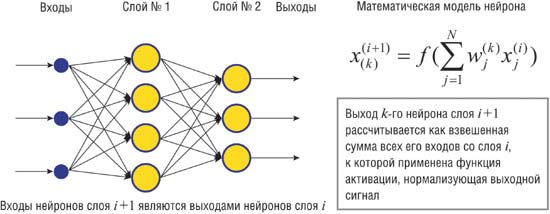

**Задание 2**. Найти и привести примеры практических задач в которых нужно использовать сигмоиду в качестве функции активации для выходного слоя и softmax. Предложить архитектуру ИНС для этих примеров

In [ ]:
# изучить самостоятельно

**Задание 3**. Изучить алгоритм обратного распространения ошибки.

In [ ]:
# изучить самостоятельно

# ДЗ по сверточным сетям (CNN.ipynb)
**Задача** Для данного ч.б. изображения построить результат применения операции свертка с ядром:
$$
\begin{pmatrix}
    1       & 2 & 1  \\
    2       & 4 & 2  \\
    1       & 2 & 1
\end{pmatrix},
$$
используя numpy.

In [ ]:
# импорт библиотек
import keras
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

#импорт данных
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
image = X_train[0]                                                              # первое изображение из обучающей выборки
conv = np.array([[1, 2, 1],                                                     # ядро свёртки
               [2, 4, 2],                                                       
               [1, 2, 1]])                   

In [ ]:
image.shape                                                                     # размер изображения в пикселях

(28, 28)

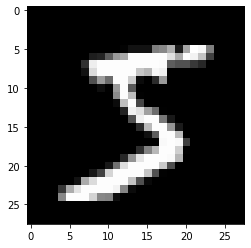

In [ ]:
plt.imshow(X_train[0], cmap='gray', interpolation='none')                       # исходное изображение

In [ ]:
stride = conv.shape[0]//2                                                       # отступ, на который сокращается изображение после свёртки
conv_image = np.empty((image.shape[0]-(stride)*2, image.shape[1]-(stride)*2))   # пустой массив, играющий роль нового изображения
for i in range(stride,image.shape[0]-stride):                                   # проходим циклами по изображению
  k = []                                                                        # список хранения произведений частей изображения на ядро
  for j in range(stride, image.shape[0]-stride):
    k=image[i-stride:i+stride+1, j-stride:j+stride+1] * conv                    # поэлементное умножение части изображения на ядро
    conv_image[i-stride, j-stride] = k.sum()                                    # суммируем для получения элемента нового изображения

conv_image.shape                                                                # как и ожидалось размерности выходного изображения меньше на 2 пикселя
                                                                                # ядро 3 на 3 "съедает" по пикселю с каждой стороны

(26, 26)

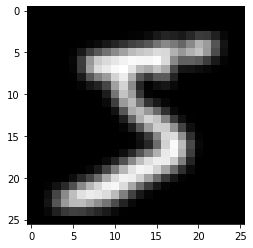

In [ ]:
plt.imshow(conv_image, cmap='gray', interpolation='none')                       # свёрнутое изображение

**Задание 1.** Попрообвать менять количество и размеры ядер конволюций, сравнить полученные результаты.

https://github.com/sambit9238/Deep-Learning/blob/master/cnn_mnist.ipynb

**Задание 2.*** Решить с помощю одномерных сверток задачу классификации тектов по тональности из занятия про рекурентные сети.

см. например
https://github.com/jsrpy/NLP_Sentiment_Analysis/blob/master/IMDB_reviews_sentiment_classify.ipynb


https://colab.research.google.com/drive/1IAZb3md_yFdCsmKYCwdgP6vKYprcpdWn

In [ ]:
import numpy as np
from tensorflow import keras
from keras import layers, utils
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, Conv1D, MaxPooling1D, Flatten

max_features = 20000  
maxlen = 200

In [ ]:
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=max_features)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

17473536/17464789 [==============================] - 0s 0us/step
25000 Training sequences
25000 Validation sequences


In [ ]:
model = Sequential()
model.add(Embedding(max_features, 64, input_length=maxlen))
model.add(Conv1D(32, 7, activation = 'relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv1D(32, 7, activation = 'relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 194, 32)           14368     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 97, 32)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 97, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 91, 32)            7200      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 45, 32)           0         
 1D)                                                  

In [ ]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=128, epochs=2, validation_data=(x_val, y_val))

Epoch 1/2
196/196 [==============================] - 30s 151ms/step - loss: 0.5719 - accuracy: 0.6467 - val_loss: 0.3413 - val_accuracy: 0.8535
Epoch 2/2
196/196 [==============================] - 29s 149ms/step - loss: 0.2500 - accuracy: 0.9003 - val_loss: 0.3254 - val_accuracy: 0.8641


# ДЗ по рекуррентным сетям (RNN.ipynb)
**Задание 1**. Переделать модель используя keras Sequential.

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding

max_features = 20000  
maxlen = 200

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 200, 64)           49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,642,497
Trainable params: 2,642,497
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(
    num_words=max_features
)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

25000 Training sequences
25000 Validation sequences


In [ ]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val))

Epoch 1/2
782/782 [==============================] - 260s 328ms/step - loss: 0.3772 - accuracy: 0.8314 - val_loss: 0.5019 - val_accuracy: 0.8162
Epoch 2/2
782/782 [==============================] - 257s 329ms/step - loss: 0.2109 - accuracy: 0.9201 - val_loss: 0.3817 - val_accuracy: 0.8422


**Задание 2.** Решить на тех же данных задачу используя tf-idf кодирование отзывов и логистическую регрессию, либо SVM. Сравнить результаты на валидационной выборке с RNN.

In [ ]:
from sklearn.linear_model import RidgeClassifier # будем использовать Ridge- регрессию так как она принимает разряженные матрицы возвращаемые векторайзером
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
(x_train1, y_train1), (x_val1, y_val1) = keras.datasets.imdb.load_data( #загружаем данные
    num_words=max_features
)

In [ ]:
x_train1=[ " ".join([str(x) for x in lst]) for lst in x_train1 ] # преобразуем массивы списков числовых данных в массивы строк, где числа играют роль соответствующих слов и идут через пробел

In [ ]:
x_val1=[ " ".join([str(x) for x in lst]) for lst in x_val1 ]

In [ ]:
coder=TfidfVectorizer() # создаём и обучаем кодер, кодируем данные
x_train1=coder.fit_transform(x_train1)
x_val1=coder.transform(x_val1)

In [ ]:
x_val1.shape # проверка размерности выборки после кодирования

(25000, 19990)

In [ ]:
reg=RidgeClassifier() 
reg.fit(x_train1, y_train1) # обучаем регрессию

RidgeClassifier()

In [ ]:
y_pred=reg.predict(x_val1) # предсказываем
accuracy_score(y_val1, y_pred) # проверяем точность

0.87452

# ДЗ по кластеризации (clasterization.ipynb)

### UMAP

**Задание 1.** Решить задачу понижения размерности пространства признаков для ирисов Фишера. Исходное пространство dim = 4, преобразовать в пространство размерности dim = 2.

https://ru.wikipedia.org/wiki/UMAP



In [ ]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()

In [ ]:
data = iris.data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(data) # нормализуем данные

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 2.9 MB/s 
     |████████████████████████████████| 1.1 MB 35.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=5b12a063363ab409574c1fb15dcd4e35efb2b0c361ddcb96434eef5b9b1c5cd6
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=2c75698bac0a2dd69ddb3d8a9c32c7d9fb31c6c93f91387e1248e5e57eca2c26
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
import umap

In [ ]:
reducer = umap.UMAP(random_state=42)
reduced_data = reducer.fit_transform(scaled_data) # выполняем понижение размерности алгоритмом UMAP

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
reduced_data.shape # проверка размерности

(150, 2)

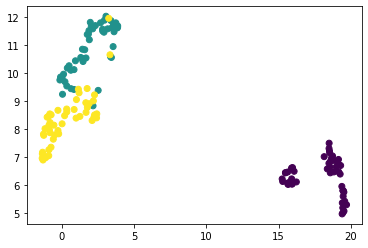

In [ ]:
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=iris.target) # результат

**Задание 2.** Выполнить кластеризацию данных MNIST - набора рукописных цифр игнорируя метки классов, используя K-means и SOM, измерить компактность кластеров (WSS), сопоставить с реальными метками (Rand score).
Выполнить снижение размерности методом UMAP, построить график.

In [ ]:
from sklearn.cluster import KMeans
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix, rand_score
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [ ]:
train_X = np.array([el.reshape((1,-1)) for el in train_X ]) # вытягиваем матрицы изображений в векторы

In [ ]:
train_X = train_X.reshape((60000, 784)) # приводим данные к двумерному виду
train_X.shape

(60000, 784)

In [ ]:
!pip install sklearn_som

In [ ]:
from sklearn_som.som import SOM # Карты Кохонена

In [ ]:
n = 10
kmeans = KMeans(n_clusters = n) # кластеризация методом K-Means
kmeans.fit(train_X)
claster_labels_KMeans = kmeans.predict(train_X)

In [ ]:
kmeans.inertia_ # возможно что WSS (но не точно)

152992551670.91174

In [ ]:
rand_score(train_y, claster_labels_KMeans) # точность кластеризации K-Means

0.8795361394912138

In [ ]:
som = SOM(m=10,n=1,dim=784) # кластеризация Картой Кохонена
som.fit(train_X, epochs=1)
som_clasters = som.predict(train_X)

In [ ]:
som.inertia_ # возможно что WSS (но не точно)

167488803575.92886

In [ ]:
rand_score(train_y, som_clasters) # точность кластеризации Картой Кохонена

0.8660515619704773

In [ ]:
reducer_mnist = umap.UMAP(random_state=42)
reduced_data_mnist = reducer_mnist.fit_transform(train_X) # выполняем понижение размерности алгоритмом UMAP

In [ ]:
reduced_data_mnist.shape # проверка размерности

(60000, 2)

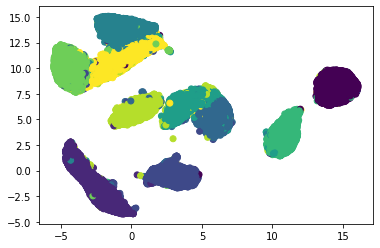

In [ ]:
plt.scatter(reduced_data_mnist[:,0], reduced_data_mnist[:,1], c=train_y) # результат

# Задача о чаевых

     |████████████████████████████████| 993 kB 7.4 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=ef805c51f878bddf77d8fdff4b3a9eaf7f7bb4255deca19afaf149bc0fc740ba
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


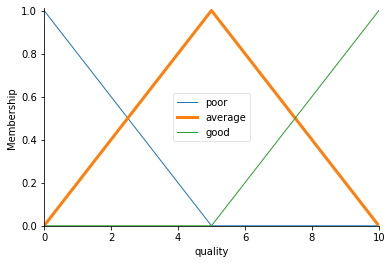

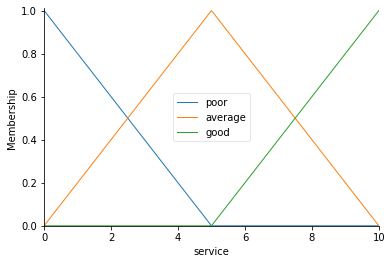

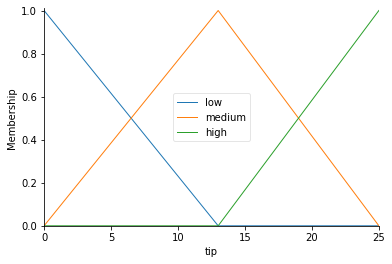

In [ ]:
!pip install -U scikit-fuzzy 
import numpy as np # подключаем библиотеку для работы с массивами
import skfuzzy as fuzz # подключаем библиотеку для работы с нечёткими множествами
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt #библиотека для построения графика
from mpl_toolkits.mplot3d import Axes3D

 # Задаем 2 входные и 1 выходную лингвистические переменные
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Разбиваем автоматически массив. Для построения функции принадлежности. Можно выбрать вариант 3, 5 или 7 термов
quality.automf(3)
service.automf(3)

# Задаем выходную переменную через треугольную функцию
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

# Визуализируем переменные
quality['average'].view()
service.view()
tip.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fab2b322c90>)

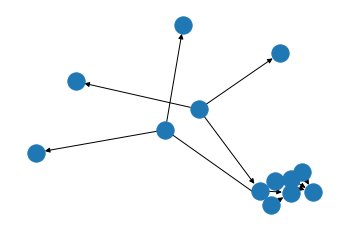

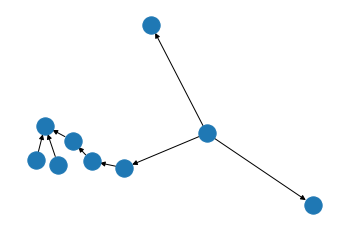

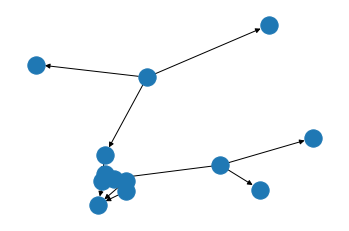

In [ ]:
# ЕСЛИ обслуживание было хорошим или качество еды было хорошим, ТОГДА чаевые будут высокими.
# ЕСЛИ обслуживание было средним, ТО чаевые будут средними.
# ЕСЛИ обслуживание было плохим, а качество еды было плохим, ТОГДА чаевые будут низкими.
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule1.view()
rule2.view()
rule3.view()

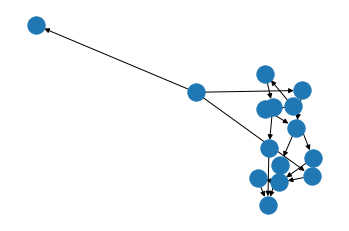

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3]) # создание базы из 3 правил
tipping_ctrl.view() # визуализация этого

16.536017923241772


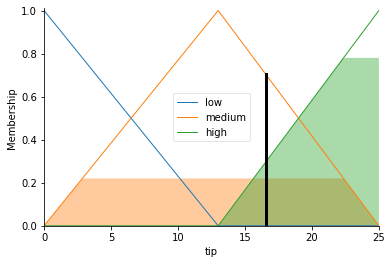

In [ ]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl) # создание модели расчета

# Подаем на вход четкие числа
tipping.input['quality'] = 7.2 
tipping.input['service'] = 8.9

tipping.compute() # запуск расчета

# Печатаем результат и выводим в виде графика
print (tipping.output['tip']) 
tip.view(sim=tipping)

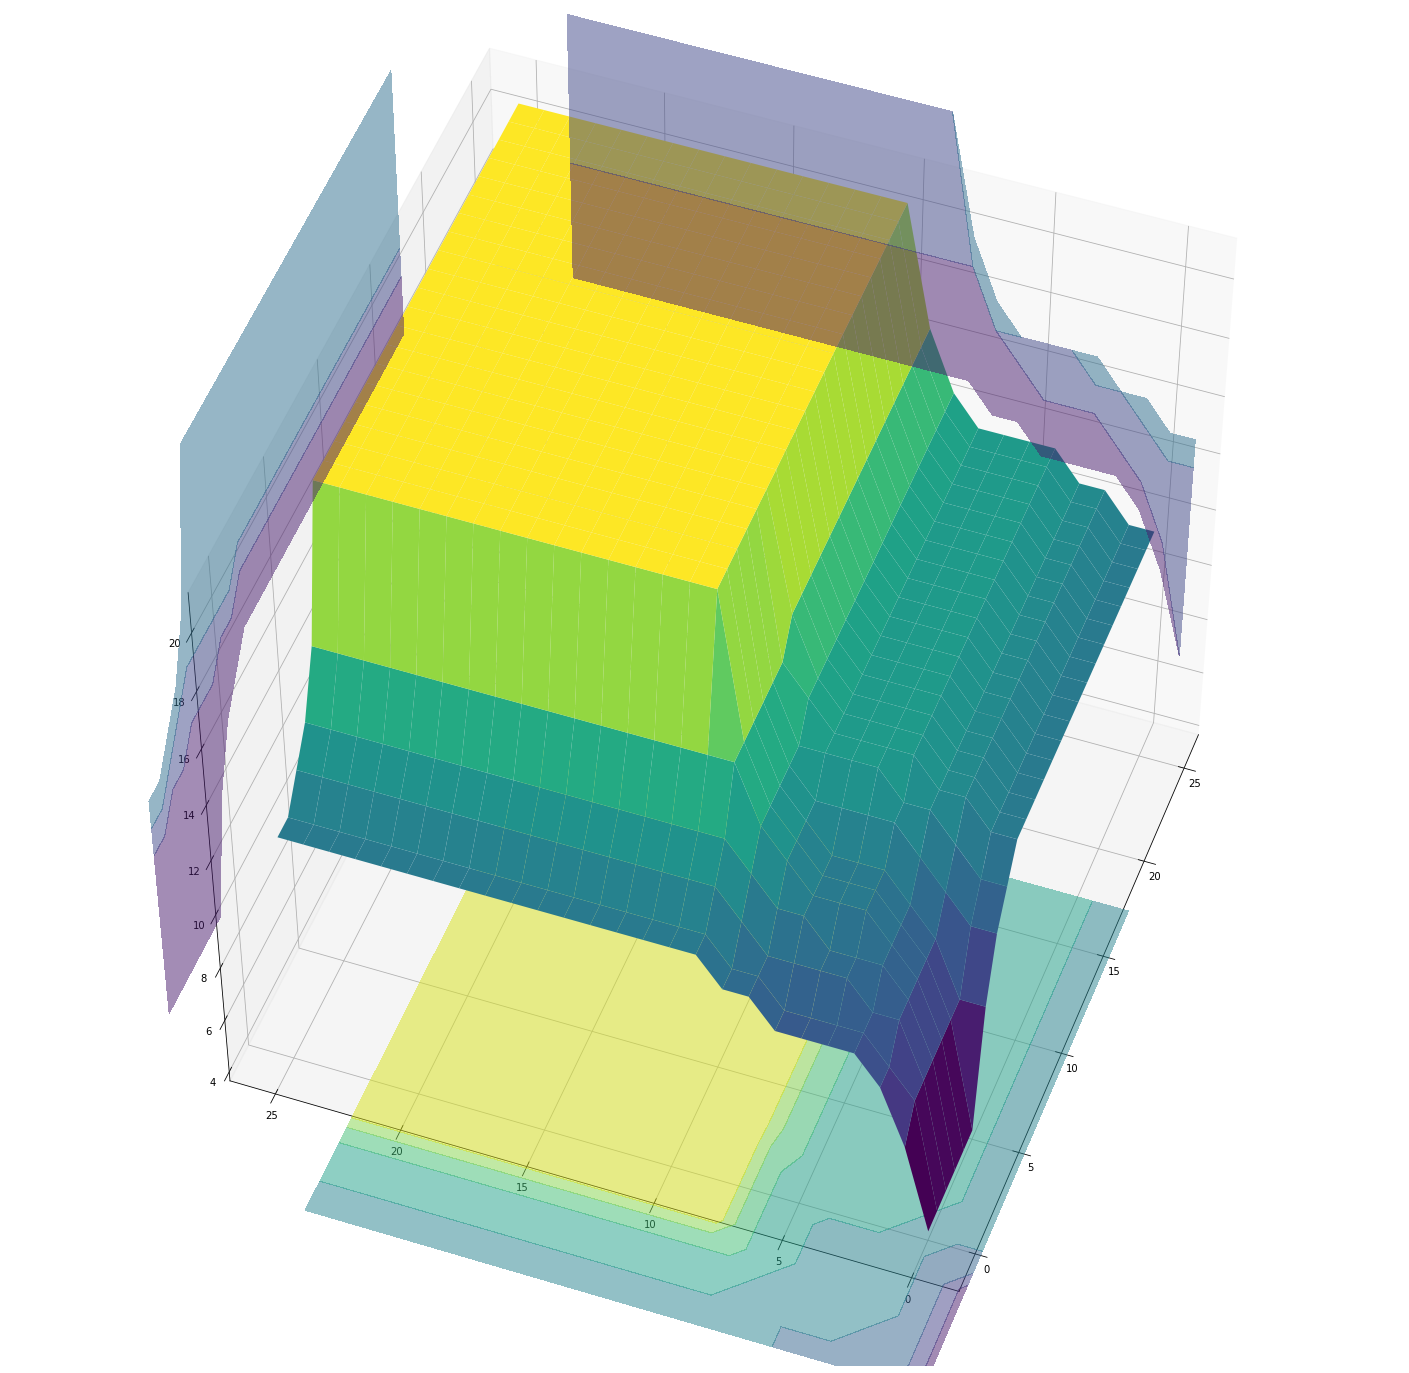

In [ ]:
# Строим трехмерную плоскость зависимости выходной переменной от 2 входных
upsampled = np.arange(0, 26, 1) # определение значения по осям в виде массива 
x, y = np.meshgrid(upsampled, upsampled) # meshgrid создаем прямоугольную сетку из массива значений x и массив значений y 
z = np.zeros_like(x) # zeros_like() возвращает новый массив из нулей с формой и типом данных указанного массива

# Вычисляем значения z в каждой точке
for i in range(26):
      for j in range(26):
            tipping.input['quality'] = x[i, j]
            tipping.input['service'] = y[i, j]
            tipping.compute()
            z[i, j] = tipping.output['tip']

# Строим по полученным значениям график
fig = plt.figure(figsize=(25, 25)) # определяем размер рисунка под график
ax = fig.add_subplot(111, projection='3d') # определяем трехмерность графика

# Создаем 3d поверхность
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
linewidth=0.4, antialiased=True)

# Создаем контуры (проекции)
cset = ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis',
alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset=30, cmap='viridis',
alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset=30, cmap='viridis',
alpha=0.5)

# Устанавливаем угол наклона графика и показываем
ax.view_init(50, 200)